# Import library

In [22]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

# Load data

In [23]:
data = pd.read_csv('../data/data_numerical/data_with_numerical_features.csv', index_col='Unnamed: 0')

# Label Encoding

In [24]:
# create a df from the column 'attack_cat' of the df data
multi_label = pd.DataFrame(data.attack_cat)
multi_label

,attack_cat
1070955,normal
916662,normal
1046586,normal
1063099,normal
521750,normal
...,...
230172,normal
1069661,normal
532255,normal
879681,normal


In [25]:
# create another df that contains numeric values
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
enc_label

,attack_cat
1070955,5
916662,5
1046586,5
1063099,5
521750,5
...,...
230172,5
1069661,5
532255,5
879681,5


In [26]:
# However, the column 'label' has not yet been adjusted.
data['label']

1070955    0.0
916662     0.0
1046586    0.0
1063099    0.0
521750     0.0
          ... 
230172     0.0
1069661    0.0
532255     0.0
879681     0.0
98939      0.0
Name: label, Length: 305802, dtype: float64

In [27]:
data['label'] = enc_label
# Now, the column 'label' has been adjusted appropriately.
data['label']

1070955    5
916662     5
1046586    5
1063099    5
521750     5
          ..
230172     5
1069661    5
532255     5
879681     5
98939      5
Name: label, Length: 305802, dtype: int64

In [28]:
# LABEL ENCODING:
# For example, if 'attack_cat' has 9 categories (Analysis, Backdoor, ..., Worms)
# then the use of .get_dummies() will replace the column 'attack_cat' by 9 new columns.
# The new columns include 'attack_cat_Analysis', 'attack_cat_Backdoor', ..., 'attack_cat_Worms'.
data = pd.get_dummies(data, columns=['attack_cat'])
data

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,state_REQ,state_RST,attack_cat_backdoors,attack_cat_dos,attack_cat_exploits,attack_cat_fuzzers,attack_cat_generic,attack_cat_normal,attack_cat_reconnaissance,attack_cat_worms
1070955,59.166.0.1,4951,149.171.126.9,21,0.013459,0.000294,0.000787,0.0,0.114625,0.002998,...,0.0,0.0,0,0,0,0,0,1,0,0
916662,59.166.0.4,62358,149.171.126.1,25,0.001210,0.003865,0.000712,0.0,0.114625,0.005179,...,0.0,0.0,0,0,0,0,0,1,0,0
1046586,59.166.0.5,57496,149.171.126.2,53,0.000018,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
1063099,59.166.0.1,62868,149.171.126.0,47026,0.000816,0.000907,0.000089,0.0,0.114625,0.001090,...,0.0,0.0,0,0,0,0,0,1,0,0
521750,59.166.0.7,39489,149.171.126.3,53,0.000019,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230172,59.166.0.7,52739,149.171.126.4,21,0.014025,0.000294,0.000788,0.0,0.114625,0.002998,...,0.0,0.0,0,0,0,0,0,1,0,0
1069661,59.166.0.3,32346,149.171.126.5,53,0.000018,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
532255,59.166.0.2,7346,149.171.126.3,53,0.000017,0.000008,0.000034,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
879681,59.166.0.9,18776,149.171.126.3,53,0.000020,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0


# Correlation between features of dataset

In [29]:
# select all columns of numeric types (including the label column if applicable)
num_col = list(data.select_dtypes(include='number').columns)
print(num_col)

['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_ACC', 'state_CLO', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST', 'attack_cat_backdoors', 'attack_cat_dos', 'attack_cat_exploits', 'attack_cat_fuzzers', 'attack_cat_generic', 'attack_cat_normal', 'attack_cat_reconnaissance', 'attack_cat_worms']


In [30]:
len(num_col)

72

In [31]:
# compute pairwise correlation of columns
corr_matrix = data[num_col].corr()

In [32]:
corr_matrix.shape

(72, 72)

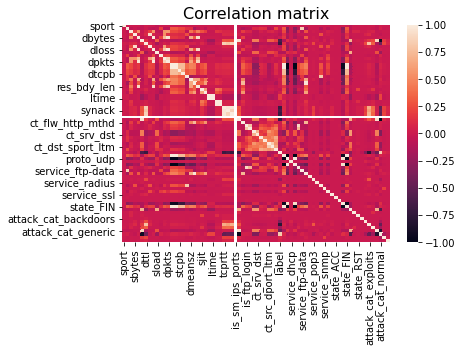

In [33]:
# Correlation Matrix for Multi-class Labels
plt.figure()
sns.heatmap(corr_matrix)
plt.title('Correlation matrix', fontsize=16)
plt.savefig('../plots/correlation_matrix_multi.png')
plt.show()

# Feature Selection

In [34]:
# corr. value between X and Y, where X = 'label' and Y is an arbitrary column
corr_xy_given_x_is_label = corr_matrix['label']
corr_xy_given_x_is_label

sport                        0.008341
dsport                       0.022568
dur                         -0.036179
sbytes                      -0.088411
dbytes                       0.011452
                               ...   
attack_cat_fuzzers          -0.223584
attack_cat_generic          -0.442828
attack_cat_normal            0.830175
attack_cat_reconnaissance    0.086337
attack_cat_worms             0.049102
Name: label, Length: 72, dtype: float64

In [35]:
most_corr_values = corr_xy_given_x_is_label[ abs(corr_xy_given_x_is_label) > 0.15 ] #>0.3
most_corr_values

sttl                  -0.603906
dttl                  -0.695958
stime                  0.189091
ltime                  0.189086
tcprtt                -0.687512
synack                -0.626968
ackdat                -0.700732
ct_state_ttl          -0.690811
ct_srv_src            -0.169348
ct_srv_dst            -0.163855
label                  1.000000
service_pop3          -0.239378
state_INT             -0.311862
attack_cat_dos        -0.347467
attack_cat_exploits   -0.780584
attack_cat_fuzzers    -0.223584
attack_cat_generic    -0.442828
attack_cat_normal      0.830175
Name: label, dtype: float64

In [36]:
print(len(most_corr_values))
# indexing
multi_cols = most_corr_values.index
multi_cols

18


Index(['sttl', 'dttl', 'stime', 'ltime', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'label', 'service_pop3',
       'state_INT', 'attack_cat_dos', 'attack_cat_exploits',
       'attack_cat_fuzzers', 'attack_cat_generic', 'attack_cat_normal'],
      dtype='object')

In [37]:
# the data extracted from the data ''data''
multi_data = data[multi_cols]

# Multi-Class Classification

In [38]:
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=50)

# Save data

In [39]:
X_train.to_csv('../data/data_numerical/multiple_classification/X_train.csv')
X_test.to_csv('../data/data_numerical/multiple_classification/X_test.csv')
y_train.to_csv('../data/data_numerical/multiple_classification/y_train.csv')
y_test.to_csv('../data/data_numerical/multiple_classification/y_test.csv')